<a href="https://colab.research.google.com/github/ethanoutangoun/csgomatchpredictor/blob/main/macth_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CODE FOR QUESTIONS



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## HELPER FUNCTIONS

In [ ]:
allStats = ['rating','impact','kdr','dmr','kpr','apr','dpr','spr','opk_ratio','opk_rating','wins_perc_after_fk',
            'fk_perc_in_wins','multikill_perc','rating_at_least_one_perc','is_sniper','clutch_win_perc']

def get_players():
    allPlayers = []
    for t in range(2):
        for p in range(5):
            allPlayers.append('t' + str(t + 1) + '_player' + str(p + 1))
    return allPlayers

def get_players_per_stat():
    allPlayers = get_players()
    allPlayersPerStat = {}
    for stat in allStats:
        temp = []
        for player in allPlayers:
            playerStat = player + '_' + stat
            temp.append(playerStat)
        allPlayersPerStat[stat] = temp
    return allPlayersPerStat

def get_teams():
    t1 = []
    t2 = []
    for p in range(5):
        t1.append('t1' + '_player' + str(p + 1))
        t2.append('t2' + '_player' + str(p + 1))
    return (t1, t2)

def get_player_stats(team, player):
    playerStats = []
    for stat in allStats:
        playerStats.append('t' + str(team) + '_player' + str(player) + '_' + stat)
    return playerStats


## PRE PROCESSING DATA SET

In [ ]:
import pandas as pd
import numpy as np
cs = pd.read_csv('/content/drive/MyDrive/DATA 301 Final Project/csgo_games.csv')
cs = cs.dropna()
cs

,match_date,team_1,team_2,t1_points,t2_points,t1_world_rank,t2_world_rank,t1_h2h_win_perc,t2_h2h_win_perc,winner,...,t2_player5_dpr,t2_player5_spr,t2_player5_opk_ratio,t2_player5_opk_rating,t2_player5_wins_perc_after_fk,t2_player5_fk_perc_in_wins,t2_player5_multikill_perc,t2_player5_rating_at_least_one_perc,t2_player5_is_sniper,t2_player5_clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,13,16,9,20,0.500000,0.500000,t2,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
1,2016-12-18,IMMORTALS,G2,17,19,13,10,0.500000,0.500000,t2,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
2,2016-12-18,MOUSESPORTS,IMMORTALS,16,3,12,13,0.500000,0.500000,t1,...,0.67,0.07,0.79,0.94,0.723,0.129,0.148257,0.526,False,0.733333
3,2016-12-18,DIGNITAS,G2,16,9,6,10,0.416667,0.583333,t1,...,0.69,0.09,0.85,0.96,0.739,0.147,0.135810,0.438,True,0.406250
4,2016-12-18,OPTIC,HELLRAISERS,16,10,4,20,0.500000,0.500000,t1,...,0.63,0.10,1.05,0.92,0.733,0.104,0.147018,0.528,False,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2020-01-25,VIRTUS.PRO,CLOUD9,0,2,19,17,0.500000,0.500000,t2,...,0.67,0.11,0.80,0.95,0.681,0.121,0.130481,0.444,False,0.777778
3783,2020-01-24,HEROIC,MAD LIONS,10,16,16,18,0.333333,0.666667,t2,...,0.65,0.08,0.64,0.80,0.811,0.082,0.095975,0.250,False,0.625000
3784,2020-01-19,HEROIC,FORZE,0,2,16,13,0.857143,0.142857,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677
3785,2020-01-19,CR4ZY,FORZE,0,2,20,13,0.538462,0.461538,t2,...,0.63,0.09,0.89,0.92,0.747,0.113,0.154618,0.635,False,0.709677


In [ ]:
allStats = ['rating','impact','kdr','dmr','kpr','apr','dpr','spr','opk_ratio','opk_rating','wins_perc_after_fk',
            'fk_perc_in_wins','multikill_perc','rating_at_least_one_perc','is_sniper','clutch_win_perc']
print('All unique stats available')
print(allStats)
print("\n")

allPlayers = get_players()
print('A list of all players on both teams')
print(allPlayers)
print("\n")

p2All = get_player_stats(1, 2)
print('All stats for player 2 of team 1')
print(p2All)
print("\n")

teamAll = get_teams()
print('')
print(teamAll)
print("\n")

All unique stats available
['rating', 'impact', 'kdr', 'dmr', 'kpr', 'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk', 'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc', 'is_sniper', 'clutch_win_perc']


A list of all players on both teams
['t1_player1', 't1_player2', 't1_player3', 't1_player4', 't1_player5', 't2_player1', 't2_player2', 't2_player3', 't2_player4', 't2_player5']


All stats for player 2 of team 1
['t1_player2_rating', 't1_player2_impact', 't1_player2_kdr', 't1_player2_dmr', 't1_player2_kpr', 't1_player2_apr', 't1_player2_dpr', 't1_player2_spr', 't1_player2_opk_ratio', 't1_player2_opk_rating', 't1_player2_wins_perc_after_fk', 't1_player2_fk_perc_in_wins', 't1_player2_multikill_perc', 't1_player2_rating_at_least_one_perc', 't1_player2_is_sniper', 't1_player2_clutch_win_perc']



(['t1_player1', 't1_player2', 't1_player3', 't1_player4', 't1_player5'], ['t2_player1', 't2_player2', 't2_player3', 't2_player4', 't2_player5'])




In [ ]:
for player in allPlayers:
    cs[player + "_is_sniper"] = cs[player + "_is_sniper"].astype(int)

cs.winner.map(dict(t1=1, t2=0))

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
3782    0.0
3783    0.0
3784    0.0
3785    0.0
3786    1.0
Name: winner, Length: 3783, dtype: float64

In [ ]:
allPlayersPerStat = get_players_per_stat()
teams = get_teams()
print(teams)

(['t1_player1', 't1_player2', 't1_player3', 't1_player4', 't1_player5'], ['t2_player1', 't2_player2', 't2_player3', 't2_player4', 't2_player5'])


In [ ]:
cs_norm1 = cs
teamStats = ['points', 'world_rank', 'h2h_win_perc']
for stat in teamStats:
    cs_norm1[stat] = cs_norm1['t1_' + stat] - cs_norm1['t2_' + stat]
    cs_norm1 = cs_norm1.drop('t1_' + stat, axis = 1)
    cs_norm1 = cs_norm1.drop('t2_' + stat, axis = 1)

for stat in allPlayersPerStat.keys():
    t1 = [p + "_" + stat for p in teams[0]]
    t2 = [p + "_" + stat for p in teams[1]]
    cs_norm1[stat] = (np.sum(cs_norm1[t1], axis = 1) - np.sum(cs_norm1[t2], axis = 1))
    cs_norm1 = cs_norm1.drop(t1, axis = 1)
    cs_norm1 = cs_norm1.drop(t2, axis = 1)

# cs_norm1 = cs_norm1.drop(['match_date', 'team_1', 'team_2'], axis = 1)
cs_norm1

,match_date,team_1,team_2,winner,points,world_rank,h2h_win_perc,rating,impact,kdr,...,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,is_sniper,clutch_win_perc
0,2016-12-18,CLOUD9,HELLRAISERS,t2,-3,-11,0.000000,0.22,0.22,0.28,...,-0.09,-0.01,0.61,0.03,0.130,-0.015,0.053051,0.368,0,0.270753
1,2016-12-18,IMMORTALS,G2,t2,-2,3,0.000000,0.51,0.56,0.76,...,-0.26,-0.08,1.13,0.31,0.364,0.074,0.034550,0.748,-1,0.746143
2,2016-12-18,MOUSESPORTS,IMMORTALS,t1,13,-1,0.000000,-0.37,-0.33,-0.58,...,0.14,0.04,-0.74,-0.15,-0.207,-0.021,-0.026775,-0.482,0,-0.760780
3,2016-12-18,DIGNITAS,G2,t1,7,-4,-0.166667,0.30,0.32,0.45,...,-0.18,-0.06,0.47,0.12,0.271,0.009,0.016960,0.542,-1,1.061758
4,2016-12-18,OPTIC,HELLRAISERS,t1,6,-16,0.000000,0.26,0.26,0.26,...,-0.06,0.05,0.19,0.07,-0.051,-0.017,0.047179,0.402,1,-0.177137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,2020-01-25,VIRTUS.PRO,CLOUD9,t2,-2,2,0.000000,-0.27,-0.44,-0.16,...,-0.09,-0.22,0.48,0.05,-0.237,0.018,-0.074193,-0.321,0,-0.551432
3783,2020-01-24,HEROIC,MAD LIONS,t2,-6,-2,-0.333333,0.10,0.08,0.13,...,-0.04,-0.03,0.95,0.23,-0.085,0.049,-0.018188,0.054,0,-0.568354
3784,2020-01-19,HEROIC,FORZE,t2,-2,3,0.714286,-0.05,-0.03,-0.12,...,-0.02,0.05,0.67,0.19,-0.038,0.026,-0.050476,-0.173,0,-0.050508
3785,2020-01-19,CR4ZY,FORZE,t2,-2,7,0.076923,-0.42,-0.44,-0.63,...,0.17,0.03,-0.30,-0.07,-0.312,-0.014,-0.089147,-0.981,1,-0.011111


In [ ]:
cs.loc[cs['winner'] == 't1', 'winner'] = 0 #0 MEANS TEAM
cs.loc[cs['winner'] == 't2', 'winner'] = 1 #1 MEANS TEAM2 WINS
cs.loc[cs['winner'] == 'draw', 'winner'] = 1
cs_norm = cs
# cs_norm = pd.concat([cs_norm.iloc[:0], x, cs_norm.iloc[0:]]).reset_index(drop=True)

teamStats = ['points', 'world_rank', 'h2h_win_perc']
for stat in teamStats:
    cs_norm[stat] = cs_norm['t1_' + stat] - cs_norm['t2_' + stat]
    cs_norm = cs_norm.drop('t1_' + stat, axis = 1)
    cs_norm = cs_norm.drop('t2_' + stat, axis = 1)

for stat in allPlayersPerStat.keys():
    t1 = [p + "_" + stat for p in teams[0]]
    t2 = [p + "_" + stat for p in teams[1]]
    cs_norm[stat] = (np.sum(cs_norm[t1], axis = 1) - np.sum(cs_norm[t2], axis = 1))
    cs_norm = cs_norm.drop(t1, axis = 1)
    cs_norm = cs_norm.drop(t2, axis = 1)

cs_norm = cs_norm.drop(['match_date', 'team_1', 'team_2'], axis = 1)
cs_norm = cs_norm.drop('points', axis = 1)

cs_norm = cs_norm.drop('dmr', axis = 1)
cs_norm = cs_norm.drop('winner', axis = 1)
# cs_norm = cs_norm.drop('world_rank', axis = 1)
cs_norm = cs_norm.drop('h2h_win_perc', axis = 1)
cs_norm = cs_norm.drop('is_sniper', axis = 1)

means = cs_norm.mean()
sds = cs_norm.std()
cs_norm = cs_norm.apply(lambda x: (x-means)/sds,axis=1)
cs_norm = cs_norm.fillna(0)
cs_norm


,world_rank,rating,impact,kdr,kpr,apr,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,clutch_win_perc
0,-1.320807,0.664047,0.635309,0.567011,0.573159,0.863562,-0.518440,-0.111744,0.781919,0.109346,0.632086,-0.362499,0.976720,0.769849,0.594802
1,0.528714,1.608172,1.684965,1.645863,1.393331,2.062628,-1.624510,-1.231765,1.482764,1.377677,1.893810,1.818111,0.622999,1.621633,1.616484
2,0.000279,-1.256760,-1.062665,-1.365931,-1.408923,-1.684453,0.978008,0.688271,-1.037583,-0.706009,-1.185011,-0.509507,-0.549436,-1.135457,-1.622113
3,-0.396047,0.924495,0.944031,0.949105,0.573159,1.013445,-1.104007,-0.911759,0.593229,0.517024,1.392355,0.225531,0.286713,1.159877,2.294786
4,-1.981351,0.794271,0.758798,0.522059,0.641507,1.612978,-0.323251,0.848274,0.215851,0.290536,-0.343862,-0.411502,0.864456,0.846061,-0.367780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3782,0.396605,-0.931199,-1.402259,-0.421936,-1.545619,-1.084920,-0.518440,-3.471807,0.606707,0.199941,-1.346771,0.446042,-1.456014,-0.774570,-1.172194
3783,-0.131829,0.273374,0.203097,0.229870,0.163073,0.713679,-0.193125,-0.431750,1.240163,1.015296,-0.527190,1.205580,-0.385269,0.066007,-1.208562
3784,0.528714,-0.214966,-0.136497,-0.332032,-0.657099,1.163328,-0.062999,0.848274,0.862785,0.834106,-0.273767,0.642052,-1.002567,-0.442822,-0.095636
3785,1.057149,-1.419540,-1.402259,-1.478312,-1.545619,-0.785153,1.173197,0.528268,-0.444560,-0.343629,-1.751169,-0.337998,-1.741910,-2.253984,-0.010966


### QUESTION 1

In [ ]:
# real teams vs real teams
xColumns = ['world_rank', 'rating', 'impact', 'kdr', 'dmr', 'kpr',
       'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk',
       'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc',
        'clutch_win_perc']
TLvsC9 = [0, -0.24,-0.15,-0.39,-2.9,-0.03,0,0.19,0.01,0.16,0.05,-0.351,0.016,-0.0477542226,-0.173,-0.6496965453]
HvsC9 = [0,-0.02,-0.01,-0.13,5.6,0.08,0.04,0.13,0.11,-0.35,-0.03,-0.42,-0.054,0.000423493816,0.199,-0.05649907032]
HvsTL = [0,0.22,0.14,0.26,8.5,0.11,0.04,-0.06,0.1,-0.51,-0.08,-0.069,-0.07,0.04817771641,0.372,0.593197475]
x = pd.DataFrame(data = np.reshape(TLvsC9, (1, 16)), index = [0], columns = xColumns)
x2 = pd.DataFrame(data = np.reshape(HvsC9, (1, 16)), index = [0], columns = xColumns)
x3 = pd.DataFrame(data = np.reshape(HvsTL, (1, 16)), index = [0], columns = xColumns)
x = x.drop('dmr', axis = 1)
x2 = x2.drop('dmr', axis = 1)
x3 = x3.drop('dmr', axis = 1)
x = x.append(x2)
x = x.append(x3)
x

<ipython-input-17-59d9f04d87bf>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(x2)
<ipython-input-17-59d9f04d87bf>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(x3)


,world_rank,rating,impact,kdr,kpr,apr,dpr,spr,opk_ratio,opk_rating,wins_perc_after_fk,fk_perc_in_wins,multikill_perc,rating_at_least_one_perc,clutch_win_perc
0,0.0,-0.24,-0.15,-0.39,-0.03,0.00,0.19,0.01,0.16,0.05,-0.351,0.016,-0.047754,-0.173,-0.649697
0,0.0,-0.02,-0.01,-0.13,0.08,0.04,0.13,0.11,-0.35,-0.03,-0.420,-0.054,0.000423,0.199,-0.056499
0,0.0,0.22,0.14,0.26,0.11,0.04,-0.06,0.10,-0.51,-0.08,-0.069,-0.070,0.048178,0.372,0.593197


In [ ]:
# real teams vs real teams
xColumns = ['world_rank','rating', 'impact', 'kdr', 'dmr', 'kpr',
       'apr', 'dpr', 'spr', 'opk_ratio', 'opk_rating', 'wins_perc_after_fk',
       'fk_perc_in_wins', 'multikill_perc', 'rating_at_least_one_perc',
        'clutch_win_perc']
dtvsH = [0, 0.6,1.11,0.78,46.2,0.44,0,-0.05,-0.12,2.46,0.94,0.003,0.287,-0.008557123135,0.755,-0.6591318674]
dtvsTL = [0, 0.82,1.25,1.04,54.7,0.55,0.04,-0.11,-0.02,1.95,0.86,-0.066,0.217,0.03962059328,1.127,-0.0659343924]
dtvsC9 = [0,0.58,1.1,0.65,51.8,0.52,0.04,0.08,-0.0,2.11,0.91,-0.417,0.233,-0.008133629319,0.954,-0.7156309377]
z = pd.DataFrame(data = np.reshape(dtvsH, (1, 16)), index = [0], columns = xColumns)
z2 = pd.DataFrame(data = np.reshape(dtvsTL, (1, 16)), index = [0], columns = xColumns)
z3 = pd.DataFrame(data = np.reshape(dtvsC9, (1, 16)), index = [0], columns = xColumns)
z = z.drop('dmr', axis = 1)
z2 = z2.drop('dmr', axis = 1)
z3 = z3.drop('dmr', axis = 1)
z = z.append(z2)
z = z.append(z3)
z

## NEURAL NETWORK

In [ ]:
from sklearn.base import clone

def importance(model, X):
    importances = pd.Series(np.zeros((X.shape[1],)), index=X.columns)
    weights = model.get_weights()
    for i, weight_matrix in enumerate(weights):
        importances.iloc[i] += np.abs(weight_matrix).mean()
    return importances

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

targets = cs.winner
targets = targets.values
targets[targets == 2] = 1

train_features, test_features, train_targets, test_targets = train_test_split(cs_norm, targets, train_size=0.7, test_size=0.3, stratify=targets)
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_features)

train_features_normalized = train_features
test_features_normalized = test_features

# One-hot encode the target data
num_classes = 2  # Assuming binary classification
#train_target_data = to_categorical(train_targets, num_classes=num_classes)
#test_target_data = to_categorical(test_targets, num_classes=num_classes)
train_target_data  = pd.get_dummies(train_targets)
test_target_data  = pd.get_dummies(test_targets)

from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(15,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

learning_rate = 0.01  # Specify the desired learning rate value
optimizer = optimizers.Adam(learning_rate=learning_rate)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_features_normalized, train_target_data, epochs=40)

results = model.evaluate(test_features_normalized, test_target_data)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])
print("Metrics Names:", model.metrics_names)


Epoch 1/40


<ipython-input-25-da45094e7c89>:25: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  train_target_data  = pd.get_dummies(train_targets)
<ipython-input-25-da45094e7c89>:26: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test_target_data  = pd.get_dummies(test_targets)


83/83 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.5789
Epoch 2/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6012
Epoch 3/40
83/83 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.6012
Epoch 4/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6144
Epoch 5/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6057
Epoch 6/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6178
Epoch 7/40
83/83 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6069
Epoch 8/40
83/83 [==============================] - 0s 1ms/step - loss: 0.6575 - accuracy: 0.6186
Epoch 9/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6174
Epoch 10/40
83/83 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6220
Epoch 11/40
83/83 [===========

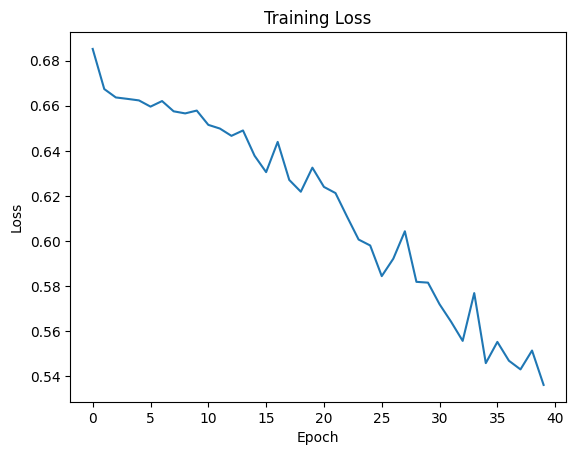

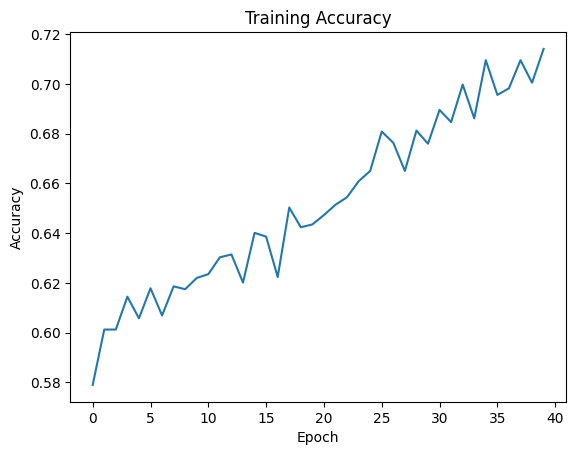

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# PREDICTING WHICH TEAM WILL WIN WITH NN

In [ ]:
predictions = model.predict(x)
# Threshold for binary classification
threshold = 0.5
binary_predictions = np.where(predictions > threshold, 1, 0)

binary_predictions

## dream team vs real team

In [ ]:
predictions = model.predict(z)
# Threshold for binary classification
threshold = 0.5
binary_predictions = np.where(predictions > threshold, 1, 0)
binary_predictions

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
predictions = model.predict(test_features_normalized)
binary_predictions = np.argmax(predictions, axis=1)
test_targets_original = np.ravel(test_targets_original)
# Calculate the confusion matrix
cm = confusion_matrix(test_targets_original, binary_predictions)
print(cm)

Evaluating the Model

In [ ]:
# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate precision, recall, and F1 score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Ranking the Importance of Training Features

In [ ]:
importances = importance(model, train_features)
importances_sorted = importances.sort_values(ascending=False)
print(importances_sorted)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# Bar Plots

In [ ]:
winner_names = []

team_1 = cs['team_1']
team_2 = cs['team_2']
winner = cs['winner']

for i in range(len(winner)):
  if winner.iloc[i] == 't1':
    winner_names.append(team_1.iloc[i])
  elif winner.iloc[i] == 't2':
    winner_names.append(team_2.iloc[i])

winner_names


import matplotlib.pyplot as plt
counts = {}
for element in winner_names:
    counts[element] = counts.get(element, 0) + 1

sorted_elements = sorted(counts.items(), key=lambda x: x[1], reverse=True)

top_elements = [element[0] for element in sorted_elements[:10]]
top_counts = [element[1] for element in sorted_elements[:10]]

plt.bar(top_elements, top_counts)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Barplot of Top 10 Winning Teams')
plt.xticks(rotation=45)
plt.show()


import matplotlib.pyplot as plt
counts = {}
for element in winner_names:
    counts[element] = counts.get(element, 0) + 1

sorted_elements = sorted(counts.items(), key=lambda x: x[1])

bottom_elements = [element[0] for element in sorted_elements[:10]]
bottom_counts = [element[1] for element in sorted_elements[:10]]

plt.bar(bottom_elements, bottom_counts)
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Barplot of Top 10 Least Winning Teams')
plt.xticks(rotation=45)
plt.yticks(range(int(max(bottom_counts))+1))
plt.show()

# Correlation Matrix for Player 1

In [ ]:
# Correlation Matrix for player 1

import pandas as pd
import seaborn as sns

df = cs[['t1_player1_impact','t1_player1_rating','t1_player1_kdr','t1_player1_dmr','t1_player1_kpr','t1_player1_dpr','t1_player1_apr','t1_player1_spr','t1_player1_opk_ratio','t1_player1_opk_rating','t1_player1_wins_perc_after_fk','t1_player1_fk_perc_in_wins','t1_player1_multikill_perc']]
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Polynomial Basis Functions for Team 1 Players

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Player 1
rating = cs['t1_player1_rating']
impact = cs['t1_player1_impact']
kdr = cs['t1_player1_kdr']
kpr = cs['t1_player1_kpr']
multikill_perc = cs['t1_player1_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 1 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 2
rating = cs['t1_player2_rating']
impact = cs['t1_player2_impact']
kdr = cs['t1_player2_kdr']
kpr = cs['t1_player2_kpr']
multikill_perc = cs['t1_player2_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 2 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 3
rating = cs['t1_player3_rating']
impact = cs['t1_player3_impact']
kdr = cs['t1_player3_kdr']
kpr = cs['t1_player3_kpr']
multikill_perc = cs['t1_player3_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 3 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 4
rating = cs['t1_player4_rating']
impact = cs['t1_player4_impact']
kdr = cs['t1_player4_kdr']
kpr = cs['t1_player4_kpr']
multikill_perc = cs['t1_player4_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 4 Polynomial Linear Regression')
plt.legend()
plt.show()




# Player 5
rating = cs['t1_player5_rating']
impact = cs['t1_player5_impact']
kdr = cs['t1_player5_kdr']
kpr = cs['t1_player5_kpr']
multikill_perc = cs['t1_player5_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 5 Polynomial Linear Regression')
plt.legend()
plt.show()

# The r-squared value for player 1 and player 5 higher compared to for players 2, 3, and 4.
# This tells us that the rating of rating of player 1 and 5 is more predictable from the model.

# Polynomial Basis Functions for Team 2 Players

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Player 1
rating = cs['t2_player1_rating']
impact = cs['t2_player1_impact']
kdr = cs['t2_player1_kdr']
kpr = cs['t2_player1_kpr']
multikill_perc = cs['t2_player1_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 1 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 2
rating = cs['t2_player2_rating']
impact = cs['t2_player2_impact']
kdr = cs['t2_player2_kdr']
kpr = cs['t2_player2_kpr']
multikill_perc = cs['t2_player2_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 2 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 3
rating = cs['t2_player3_rating']
impact = cs['t2_player3_impact']
kdr = cs['t2_player3_kdr']
kpr = cs['t2_player3_kpr']
multikill_perc = cs['t2_player3_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 3 Polynomial Linear Regression')
plt.legend()
plt.show()



# Player 4
rating = cs['t2_player4_rating']
impact = cs['t2_player4_impact']
kdr = cs['t2_player4_kdr']
kpr = cs['t2_player4_kpr']
multikill_perc = cs['t2_player4_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 4 Polynomial Linear Regression')
plt.legend()
plt.show()




# Player 5
rating = cs['t2_player5_rating']
impact = cs['t2_player5_impact']
kdr = cs['t2_player5_kdr']
kpr = cs['t2_player5_kpr']
multikill_perc = cs['t2_player5_multikill_perc']

data = pd.DataFrame({'KDR': kdr,
                     'KPR': kpr,
                     'Multikill perc': multikill_perc,
                     'Impact':impact,
                     'Rating': rating})

X = data[['KDR', 'KPR', 'Multikill perc', 'Impact']]
y = data['Rating']

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)
print("R-squared Score:", r2)

plt.scatter(y, y_pred, color='red', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', linestyle='--', label='Model Line')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Player 5 Polynomial Linear Regression')
plt.legend()
plt.show()

In [ ]:
# correlation matrix
import pandas as pd
import seaborn as sns

df = cs[['t1_h2h_win_perc','t1_player1_impact','t1_player1_rating','t1_player1_kdr','t1_player1_dmr','t1_player1_kpr','t1_player1_dpr','t1_player1_apr','t1_player1_spr','t1_player1_opk_ratio','t1_player1_opk_rating','t1_player1_wins_perc_after_fk','t1_player1_fk_perc_in_wins','t1_player1_multikill_perc']]

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
